In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import linregress
from scipy.optimize import curve_fit
import scipy.stats as stats
import numpy as np
import pandas as pd

# Problem 1
## Question 10-11
### Part A

In [2]:
def plot(y, c, units='mg / L', filepath='standard.png'):
    """
    Plot individual calibration curve with linear regression for 
    a single wavelength measurment (single dataframe) 
    
    Parameters
    ----------
    y: list
        y axis values
    c: list
        concentrations
    """

    x = c

    def model(x, m, b): # linear plot
        return m * x + b

    popt, pcov = curve_fit(model, x, y)
    slope, intercept = popt

    x_space = np.linspace(min(x), max(x), 100)
    y_fit = model(x_space, slope, intercept)

    ss_res = np.sum((y - model(x, slope, intercept))**2) # risidual sum of squres
    ss_tot = np.sum((y - np.mean(y))**2) # total sum of squares
    r2 = 1 - (ss_res / ss_tot)

    n = len(x)
    sy = np.sqrt(ss_res / (n - 2)) # Standard deviations about regression
    sx = (sy / abs(slope)) * np.sqrt((1 / n) + (np.mean(y)**2 / (slope**2 * np.sum((x - np.mean(x))**2)))) # stndard deviation in concentrations

    fig, ax = plt.subplots()
    ax.plot(c, y, marker='o', linestyle='')
    ax.plot(x_space, y_fit, 'k--', label=f'y={slope:.3f}x + {intercept:.3f}, R^2 = {r2:.5f}')
            
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_ylabel('Emission Intensity')
    ax.set_xlabel(f'Concentration ({units})')
    ax.set_title(f'Standard Curve')
    ax.grid(True)
    ax.legend()
    plt.savefig(f'{filepath}')

    return slope, intercept, sy, sx


In [3]:
# c1 * v1 = c2 * v2
c1 = 10.0

v1_0 = 0.0
v1_1 = 2.5
v1_2 = 5.0
v1_3 = 10.0

v2 = 50.0

# m2 = m1 * v1 / v2
c2_0 = c1 * v1_0 / v2
c2_1 = c1 * v1_1 / v2
c2_2 = c1 * v1_2 / v2
c2_3 = c1 * v1_3 / v2

y = np.array([12568, 19324, 26622, 40021])
c = np.array([c2_0, c2_1, c2_2, c2_3])

Standard deviations about Regression: 227.61854054535922
Standard deviations for sample concentration: 0.2165344767829647


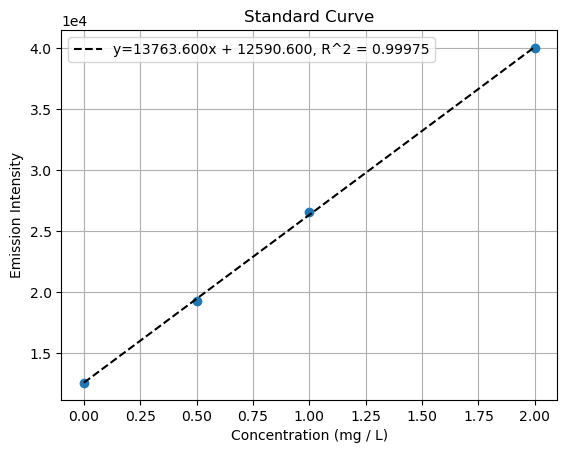

In [4]:
slope, intercept, sy, sx = plot(y, c, filepath='q1.png')
sx *= 10 # accounting for 10 fold dilution
print(f'Standard deviations about Regression: {sy}')
print(f'Standard deviations for sample concentration: {sx}')


### Part B

In [5]:
c_sample = - intercept / slope   # sample concentration before dilution
c_sample *= -10 # accounting for 10 fold dilution
c_sample

9.147752042363908

### Part C

In [6]:
c_actual = 8.51 # mg / L

n = len(c)
dof = n - 2

t_score = abs((c_sample - c_actual) / sx)

t = stats.t.ppf(0.975, dof)
print(f't-score: {t_score}, t: {t}')

t-score: 2.9452678937734973, t: 4.302652729696142


# Problem 2

In [7]:
c1 = 0.05 # mol / L

v1_1 = 0.0e-6 # L
v1_2 = 10.0e-6 # L
v1_3 = 20.0e-6 # L

v_2 = 5.50e-3 # L

c2_1 = c1 * v1_1 / v_2
c2_2 = c1 * v1_2 / v_2
c2_3 = c1 * v1_3 / v_2

y = np.array([23.0, 45.3, 68.0])
c = np.array([c2_1, c2_2, c2_3]) # mol / L

c

array([0.00000000e+00, 9.09090909e-05, 1.81818182e-04])

0.0010192592592623742

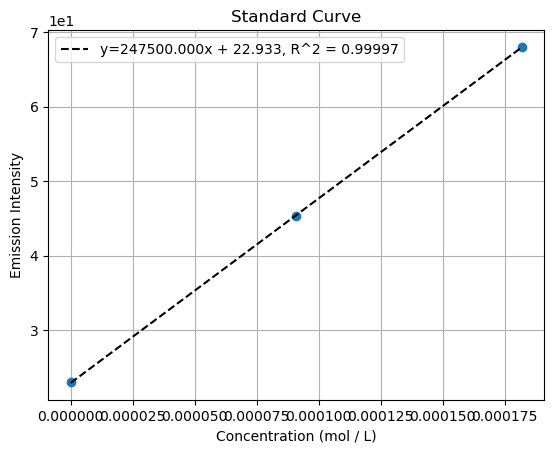

In [8]:
slope, intercept, sy, sx = plot(y, c, units='mol / L', filepath='q2.png')
c_sample = - intercept / slope
c_sample *= -11 # 11 fold dilution
c_sample

In [9]:
MM = 42.394 # g / mol
c_sample *= MM * 1e3 # mg / L
c_sample

43.21047703716909

# Problem 3

In [10]:
h = 6.62607015e-34 # J s
c = 299792458 # m/s
kb = 1.380649e-23 # J/K

nu_Na = 389.0e-9 # m
nu_Ca = 422.8e-9
nu_Zn = 213.8e-9

degn_Na = 2
degn_Ca = 3
degn_Zn = 3

T = [1500, 3000, 4000] # K

def p_j(nu, degeneracy, T):
    return degeneracy * np.exp( (-h * c) / (nu * kb * T))

for temp in T:
    print(f'Na T: {temp}, P: {p_j(nu_Na, degn_Na, temp)}')
    print(f'Ca T: {temp}, P: {p_j(nu_Ca, degn_Ca, temp)}')
    print(f'Zn T: {temp}, P: {p_j(nu_Zn, degn_Zn, temp)}\n')

Na T: 1500, P: 3.911346896725496e-11
Ca T: 1500, P: 4.2121711926216535e-10
Zn T: 1500, P: 9.84216724356581e-20

Na T: 3000, P: 8.844599365404286e-06
Ca T: 3000, P: 3.55478741669104e-05
Zn T: 3000, P: 5.433829379976651e-10

Na T: 4000, P: 0.00019287064061328707
Ca T: 4000, P: 0.0006058854723606541
Zn T: 4000, P: 1.481186727828808e-07



# Problem 4

[Cu I Spectra wavelength](https://physics.nist.gov/PhysRefData/Handbook/Tables/coppertable2.htm)

## Natural Line-width

In [11]:
lambda_0 = 324.754e-9 # m

linewidth = lambda_0**2 * (2/3)
linewidth

7.031010701066665e-14

## Doppler Broadening

In [12]:
kb = 1.380649e-23 # J/K
c = 299792458 # m/s
mm_cu = 63.546 # u

u_to_kg = 1.66054e-27 # Kg / u
mm_cu = mm_cu * u_to_kg

T_1 = 2000 # K
T_2 = 8000 # K

const_1 = np.sqrt((8 * kb * T_1 * np.log(2)) / (mm_cu * c**2))
const_2 = np.sqrt((8 * kb * T_2 * np.log(2)) / (mm_cu * c**2))

lambda_D_1 = lambda_0 * const_1
lambda_D_2 = lambda_0 * const_2

print(f'Doppler Shift at 2000K: {lambda_D_1}')
print(f'Doppler Shift at 8000K: {lambda_D_2}')

Doppler Shift at 2000K: 1.3049064843974585e-12
Doppler Shift at 8000K: 2.609812968794917e-12


# Problem 5

In [13]:
c = np.array([0.000, 0.005, 0.010, 0.020])
y = np.array([0.55, 1.30, 2.20, 4.05])

0.02718446602226178

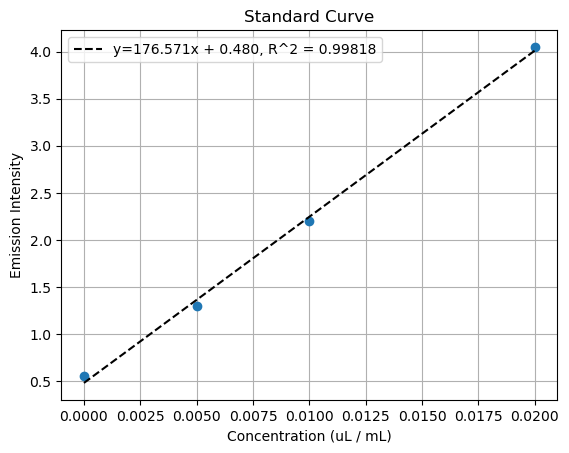

In [14]:
slope, intercept, sy, sx = plot(y, c, units='uL / mL', filepath='q5.png')
c_sample = - intercept / slope
c_sample *= -10 # 10 fold dilution
c_sample